In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as st
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sa
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding = 'unicode_escape')

In [4]:
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [6]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

 Columns to consider "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [15]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [16]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [17]:
df[df.duplicated(keep = False)]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
112  24950          8  13253  116  2000      5      5            234    1320
113  24950          8  13253  116  2000      5      5            234    1320

In [18]:
df.drop(index=[113],inplace =True)

C:\Users\himan\AppData\Local\Temp\ipykernel_3996\3214415371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[113],inplace =True)


In [25]:
df = df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

<AxesSubplot:>

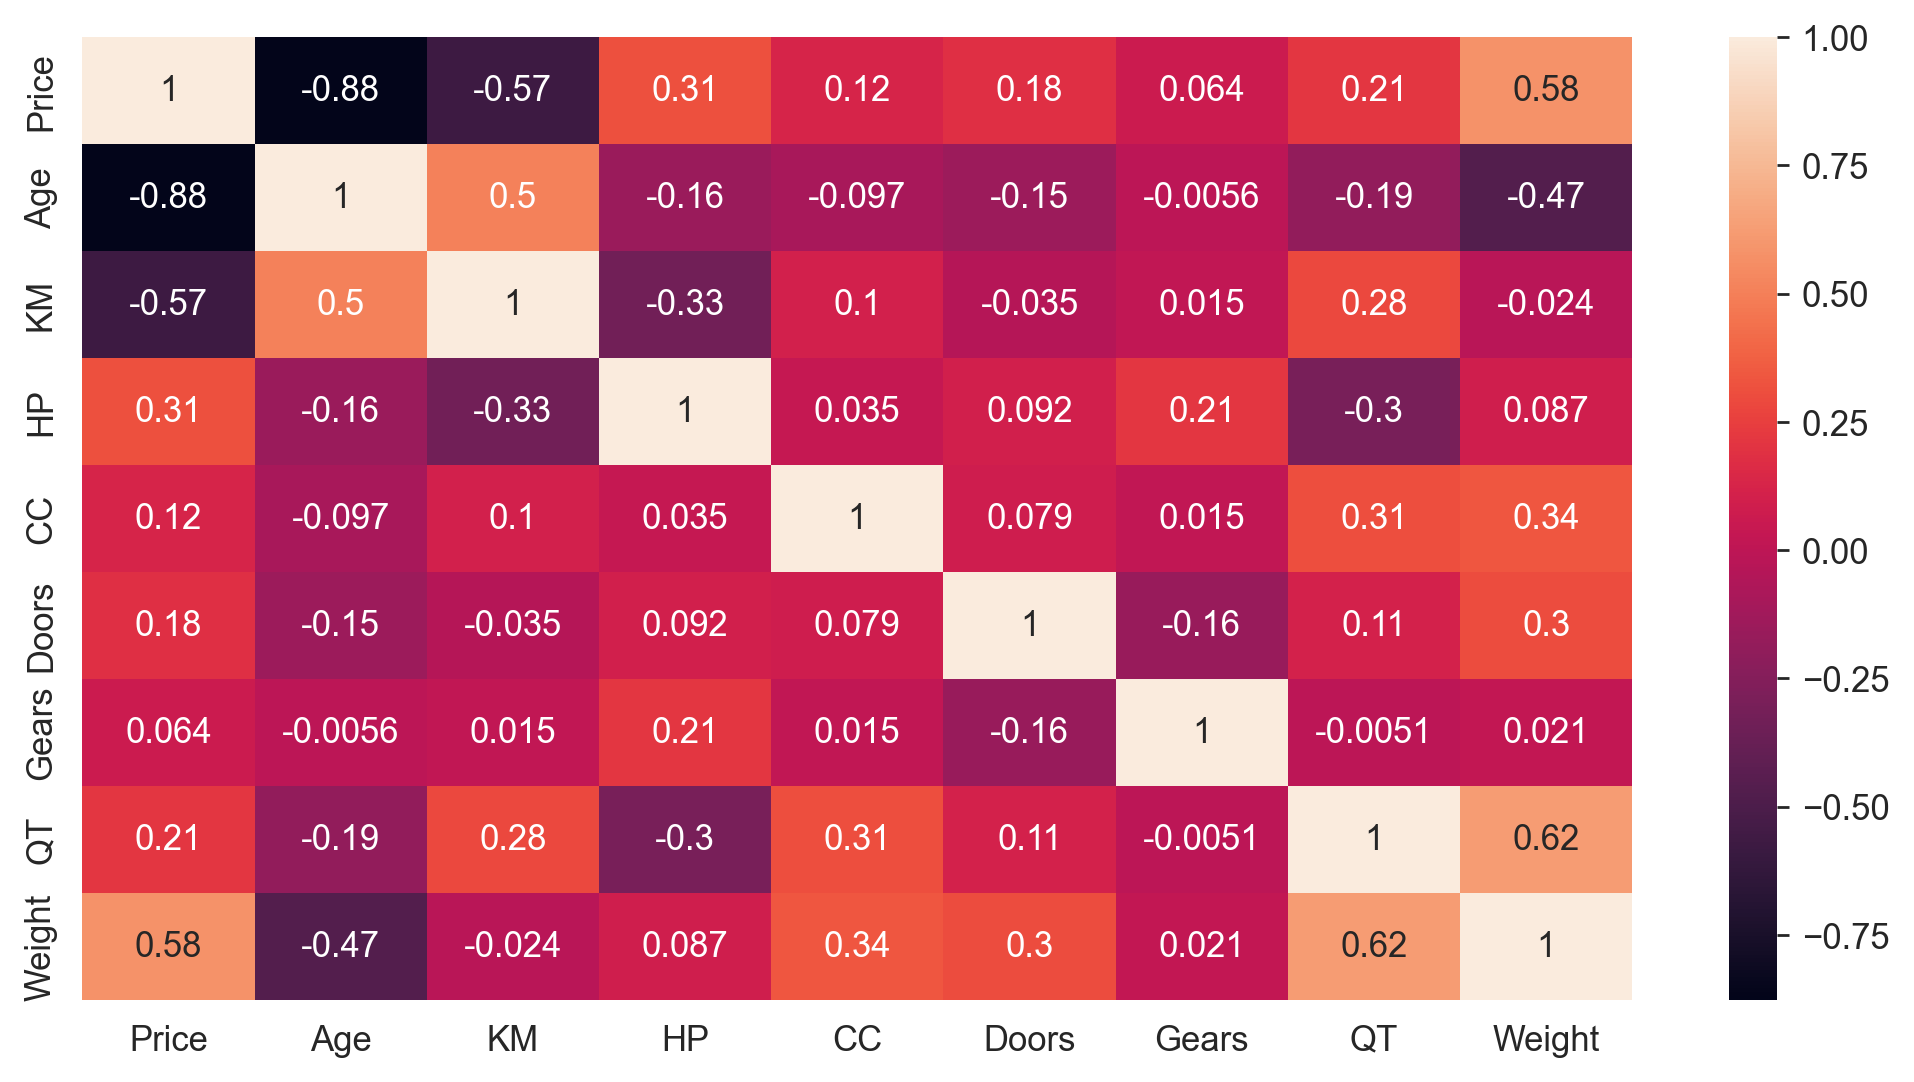

In [26]:
sns.heatmap(df.corr(),annot = True)

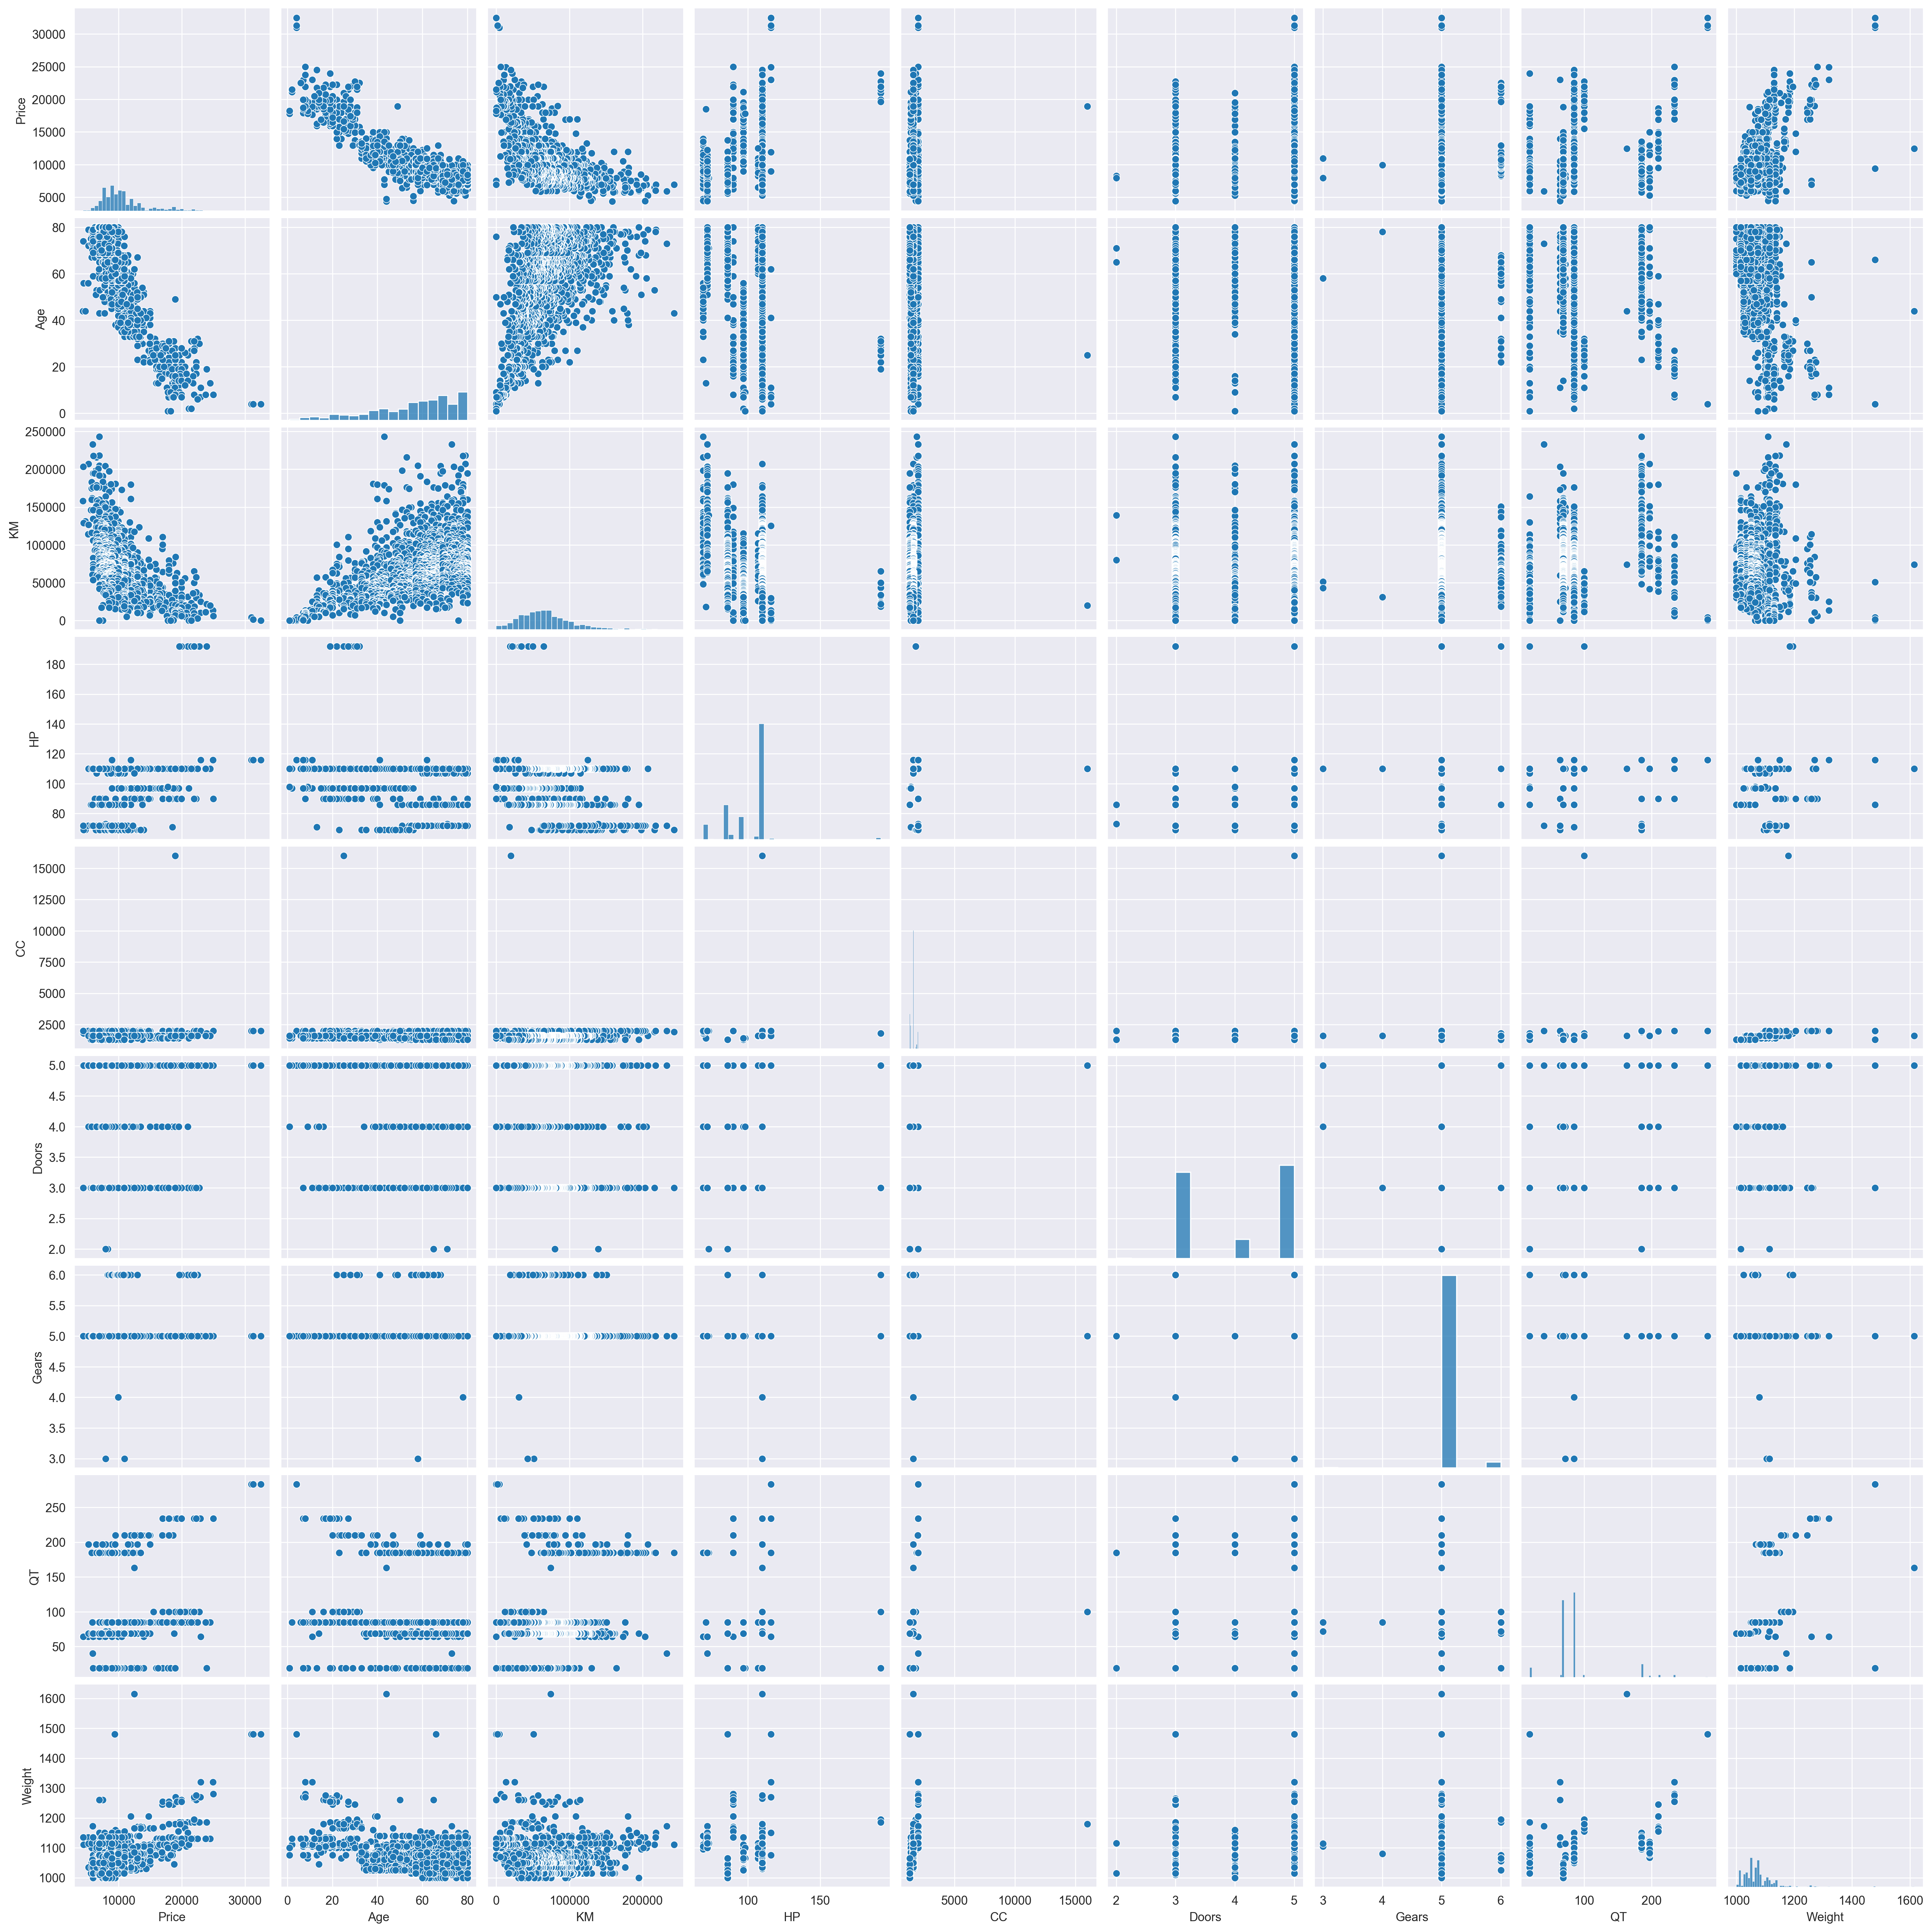

In [27]:
sns.pairplot(df)

In [29]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = df).fit()

In [32]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [34]:
model.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64

In [35]:
model.rsquared

0.8625200256947

# Varience Inflation

In [36]:
vif = pd.DataFrame()
vif['Feature'] = df.columns
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif.head()

Feature        vif
0   Price  70.770259
1     Age  46.662057
2      KM   9.005938
3      HP  71.361440
4      CC  17.201048

# Subset Selection

In [37]:
model1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight',data = df).fit()

In [39]:
model1.rsquared

0.861632231877993

In [41]:
model1.aic

24757.644103864768

We got same R^2 value even thouogh we dropped Gear Feature

In [42]:
model2 = smf.ols('Price~Age+KM+HP+CC+Gears+QT+Weight',data = df).fit()
model2.rsquared

0.8625199746430149

We got same R^2 value even thouogh we dropped Doors Feature

# Model Validation

# Residual Analysis

In [43]:
rmodel = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight',data = df).fit()

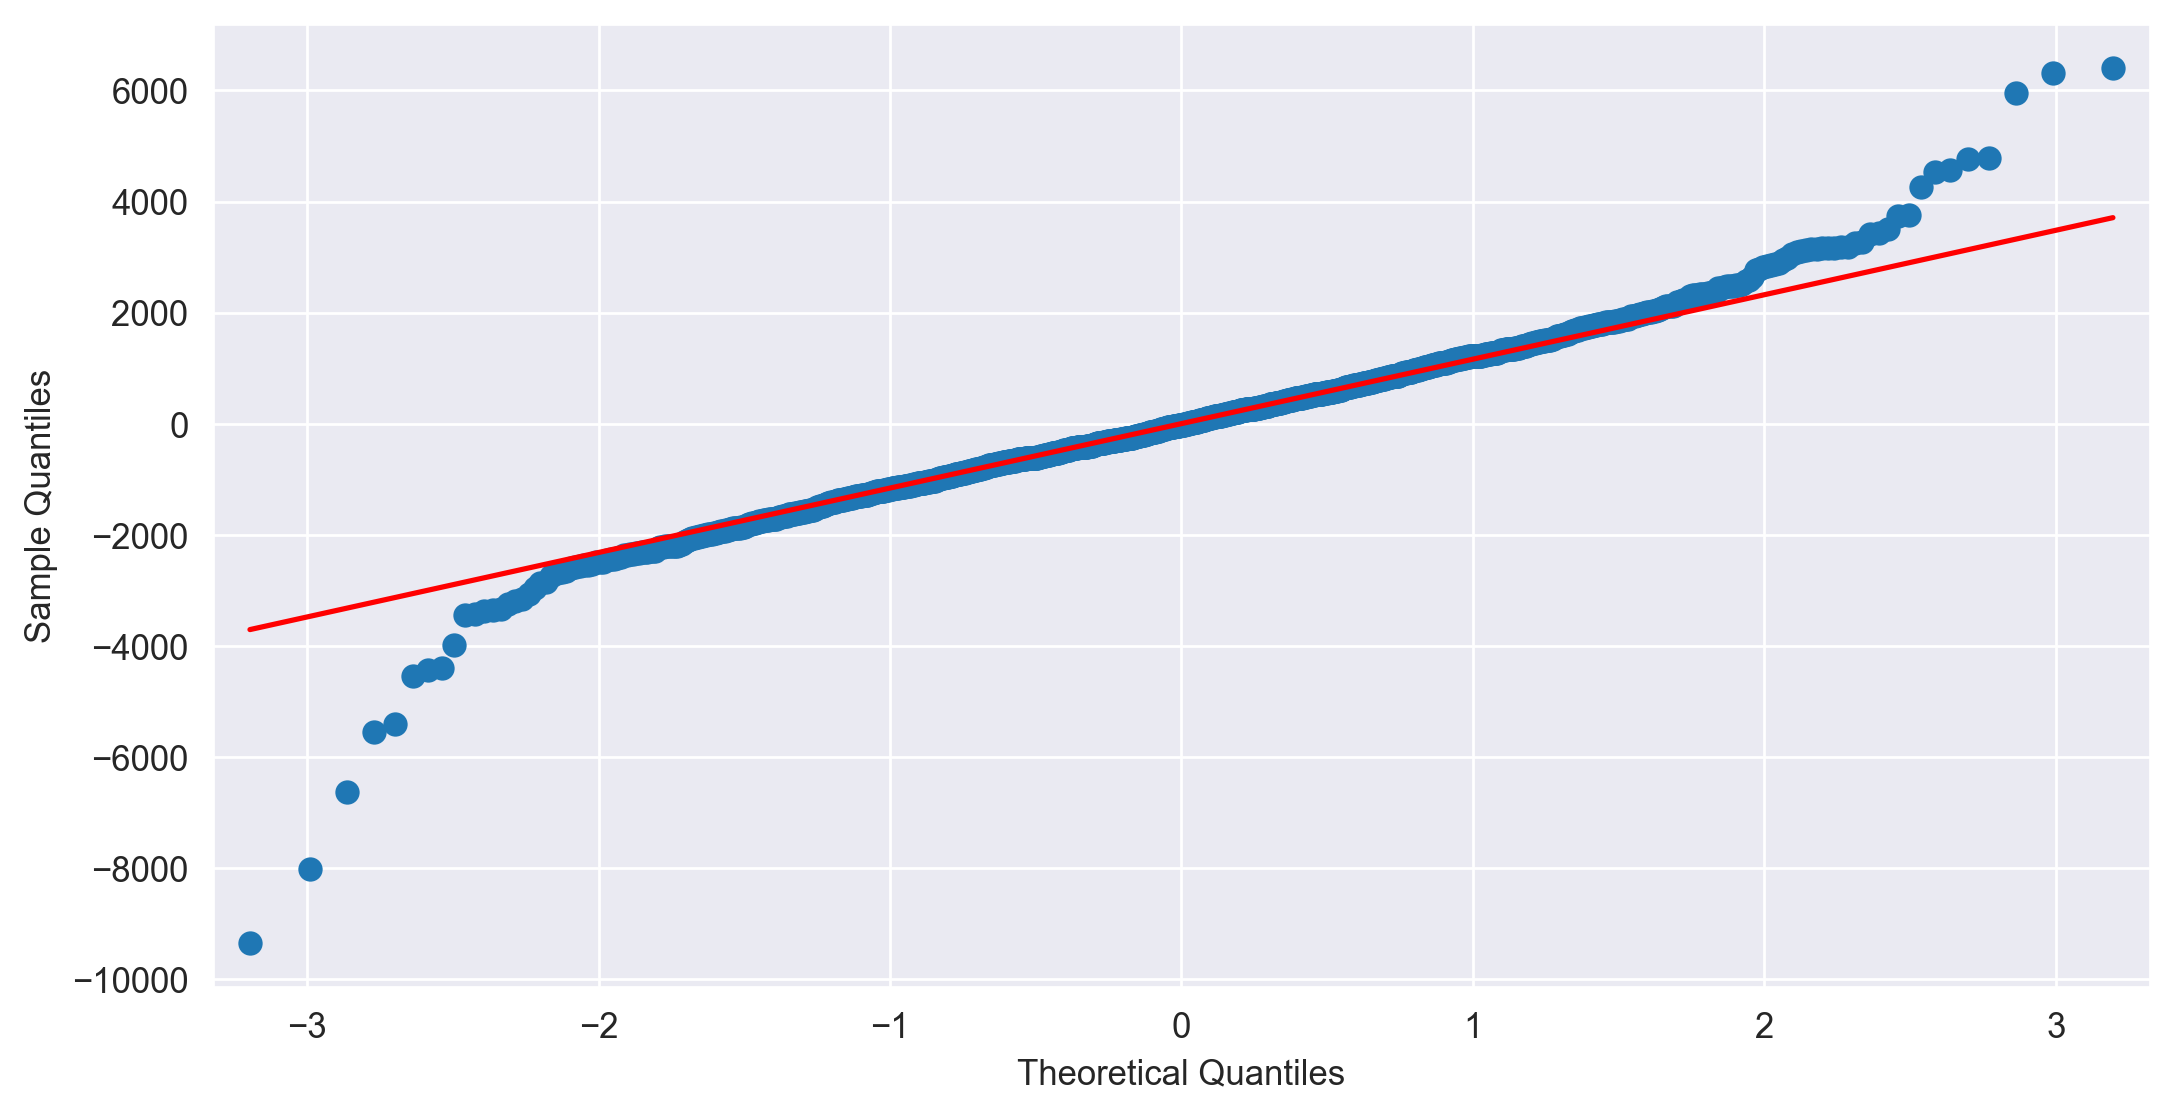

In [45]:
sa.qqplot(rmodel.resid,line='q');

In [47]:
np.where(rmodel.resid>6000)

(array([146, 522], dtype=int64),)

# Homoscedasticity

Text(0, 0.5, 'Residual Values')

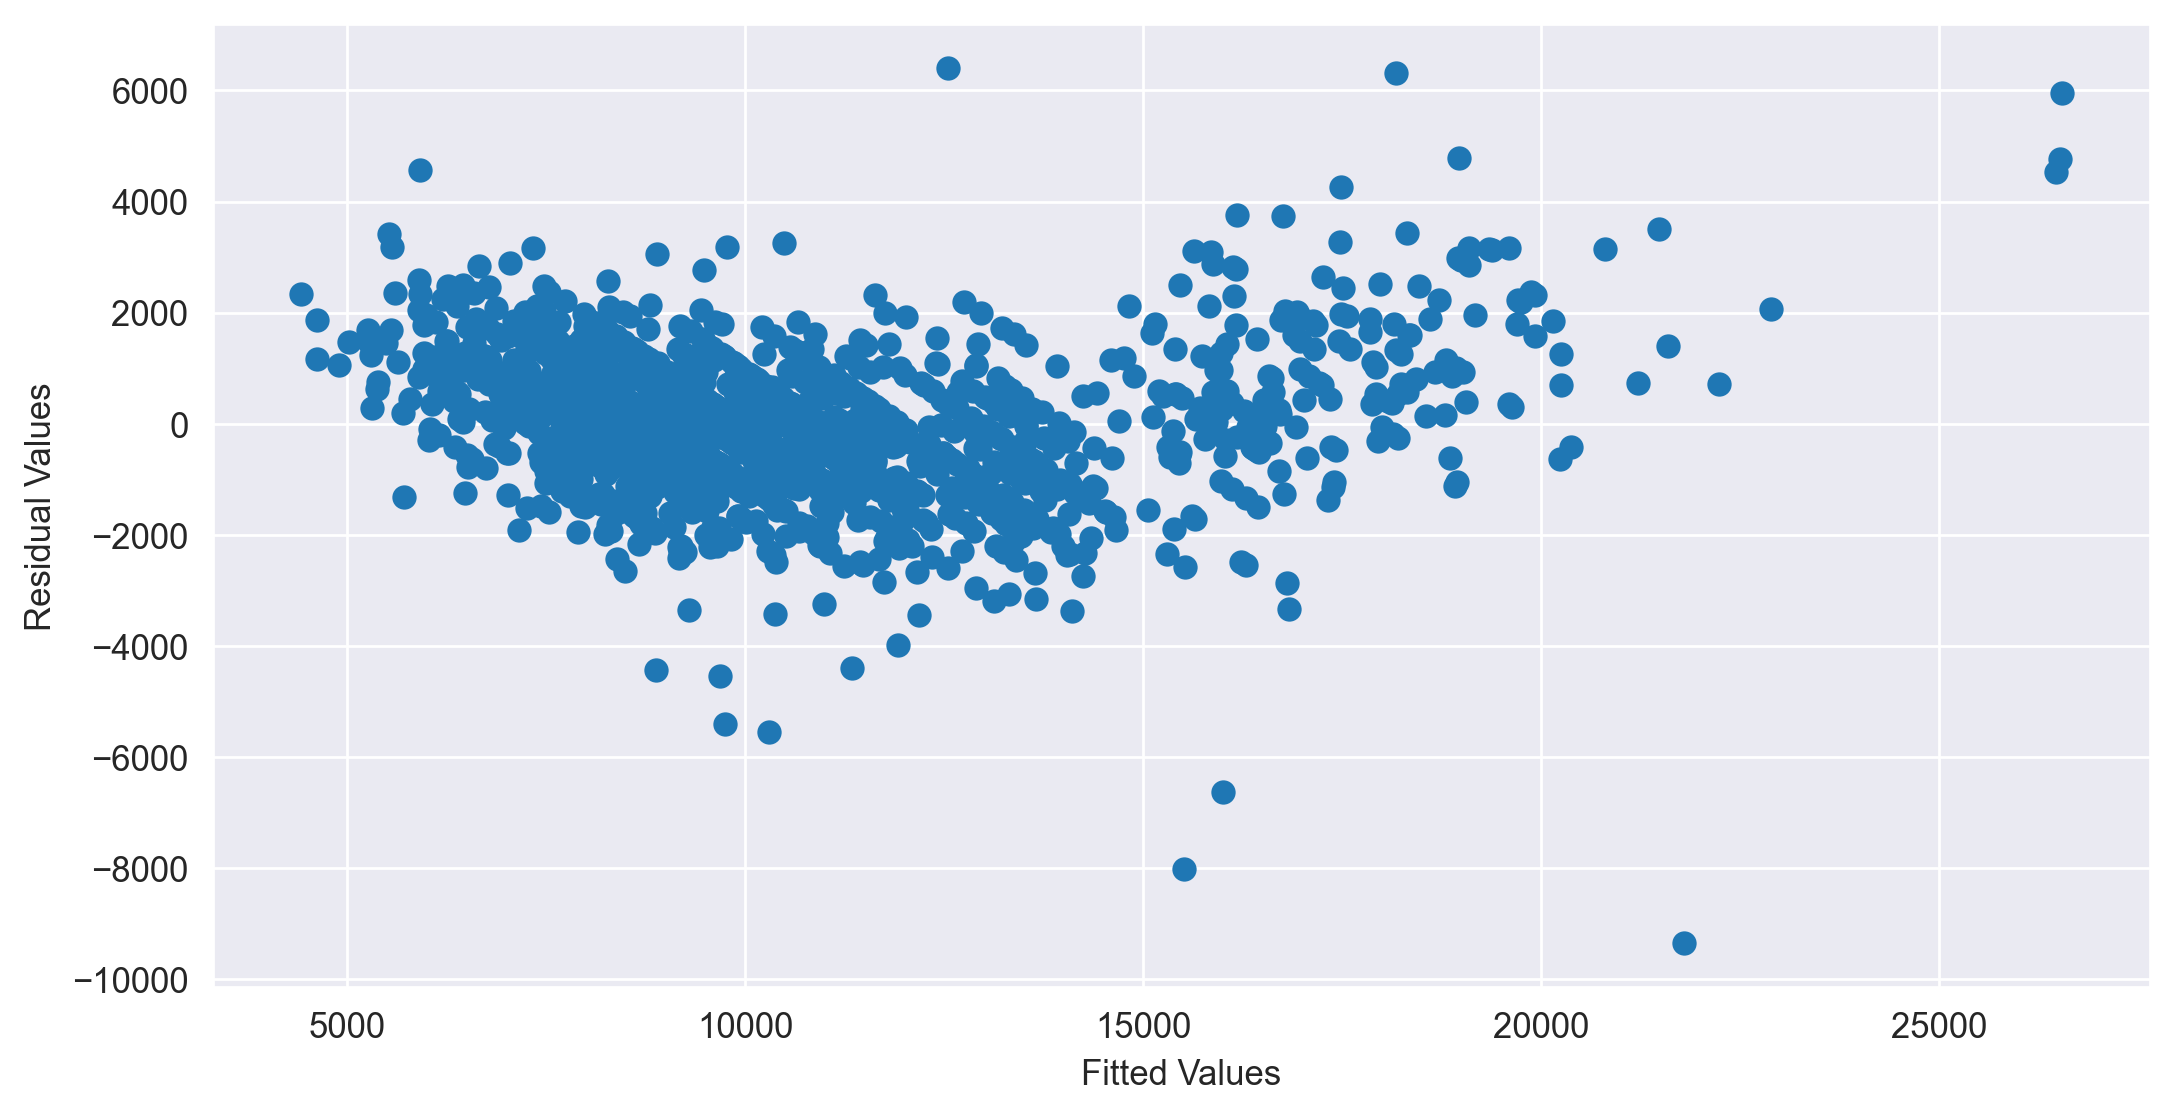

In [48]:
plt.scatter(rmodel.fittedvalues,rmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')

# Residual vs Regressor

eval_env: 1


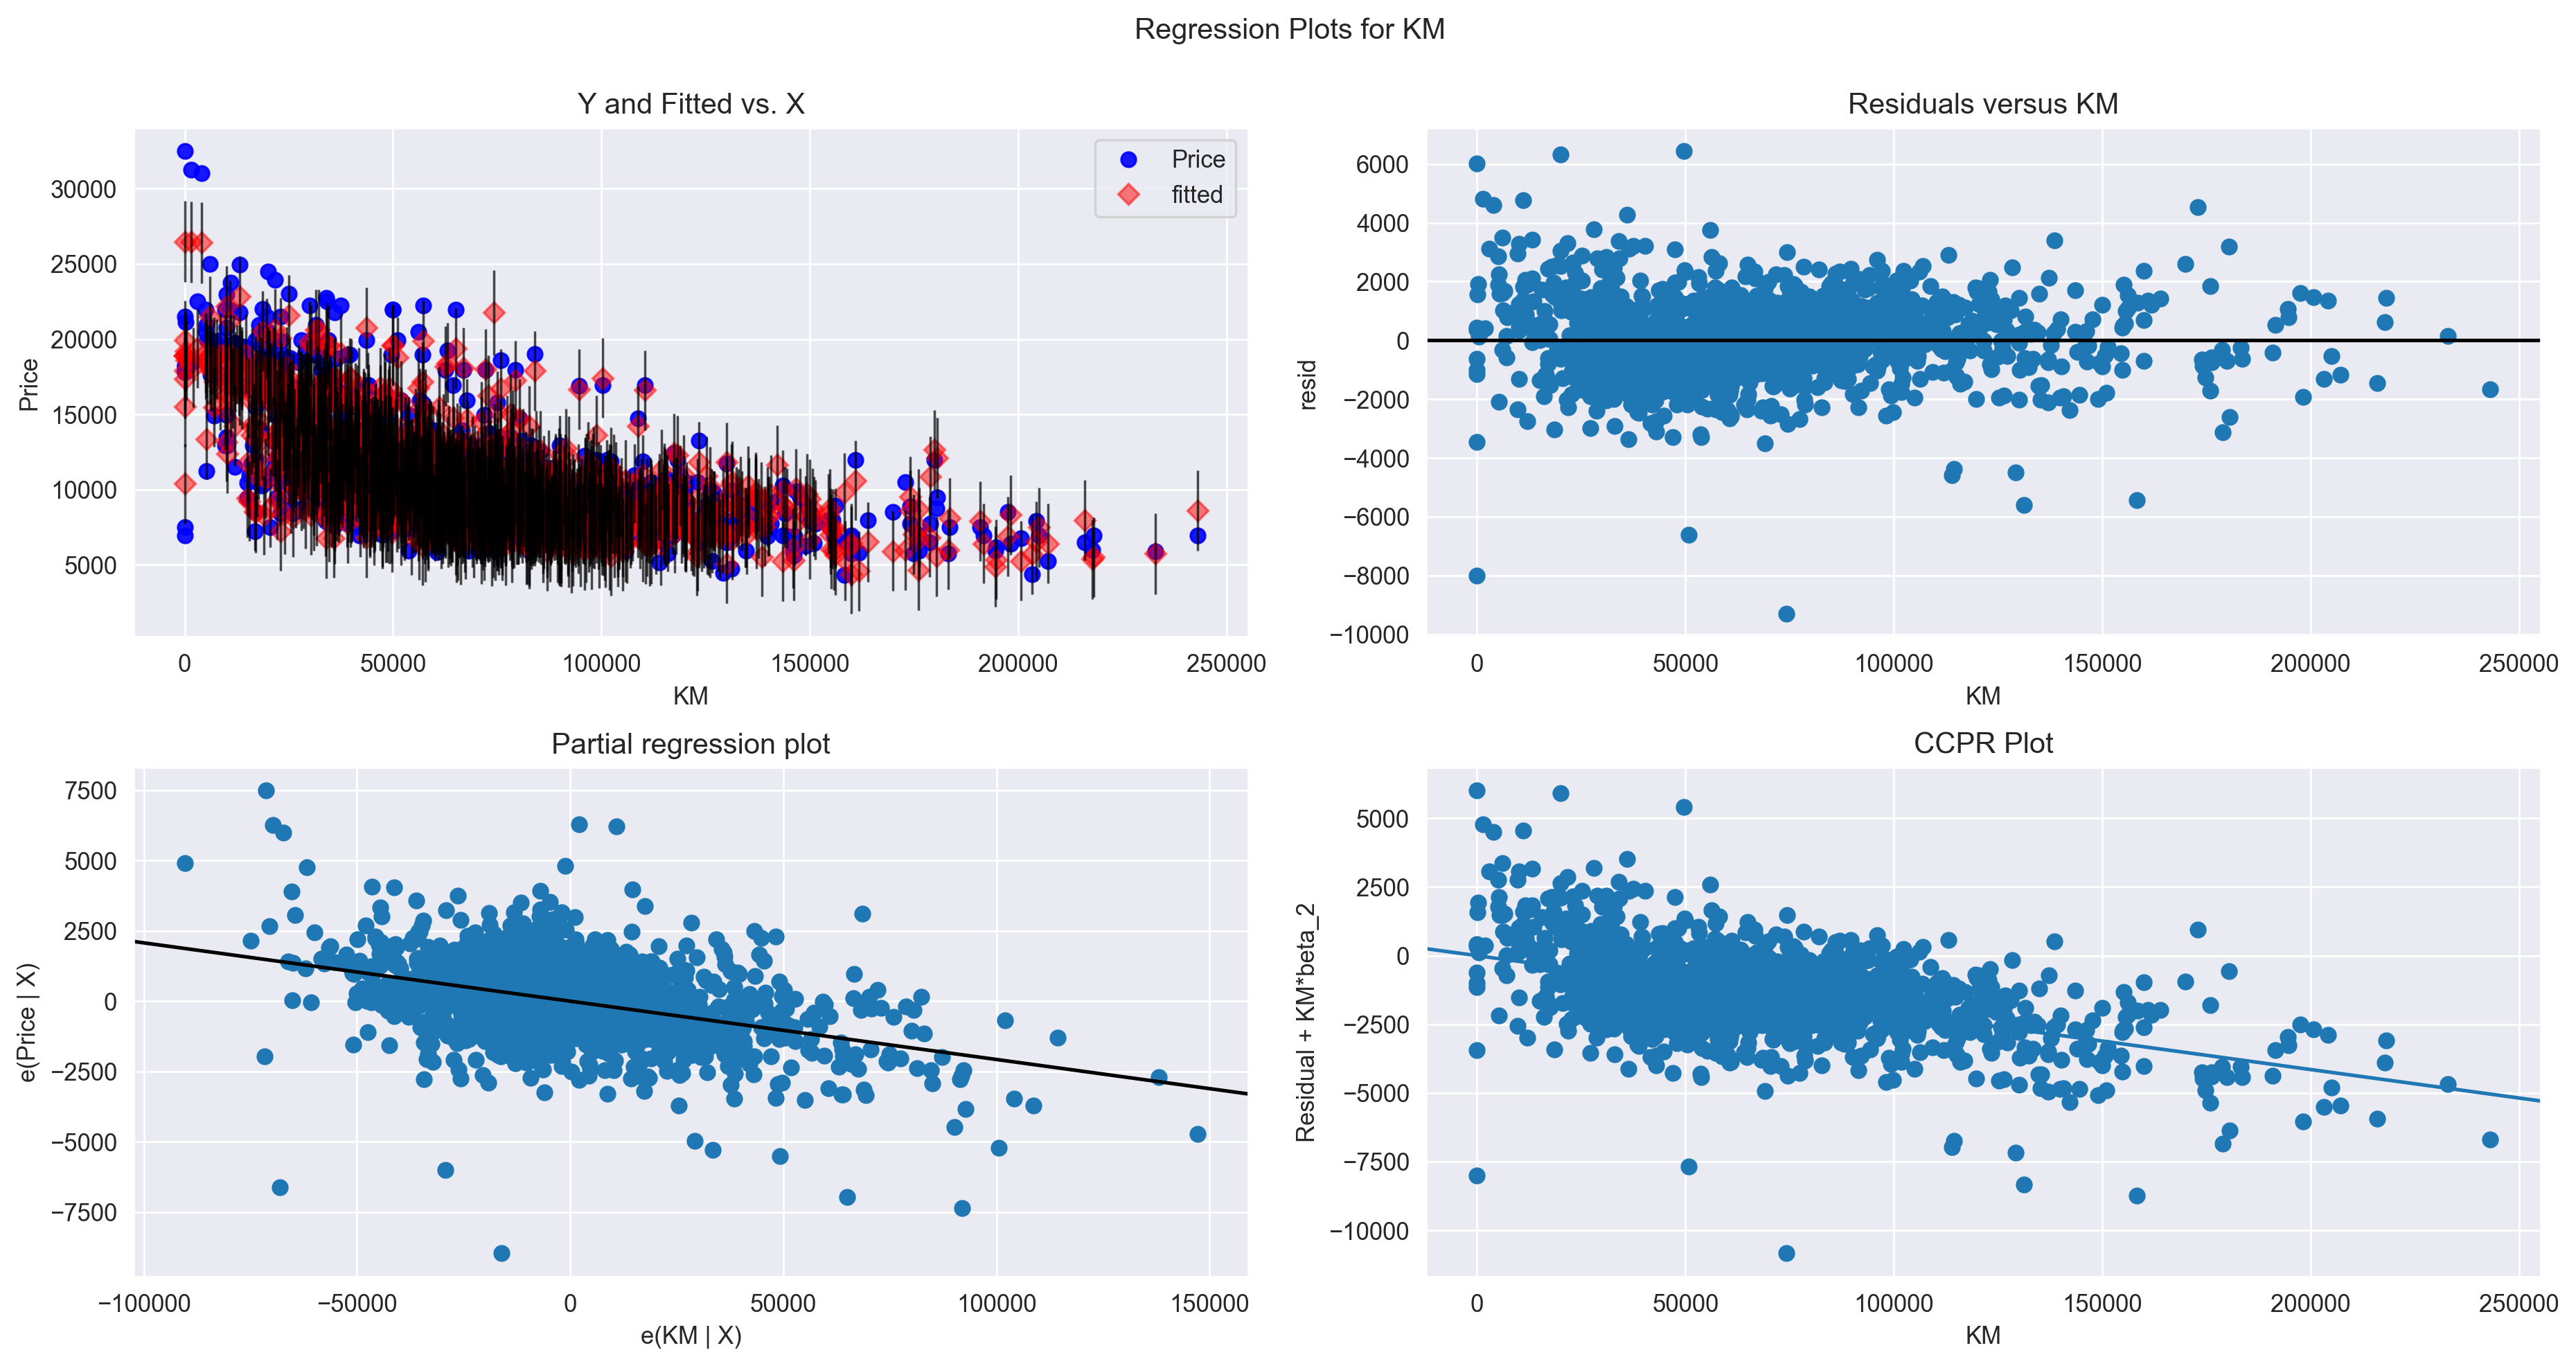

In [52]:
fig = plt.figure(figsize = (15,8))
sa.graphics.plot_regress_exog(model,'KM',fig = fig);

eval_env: 1


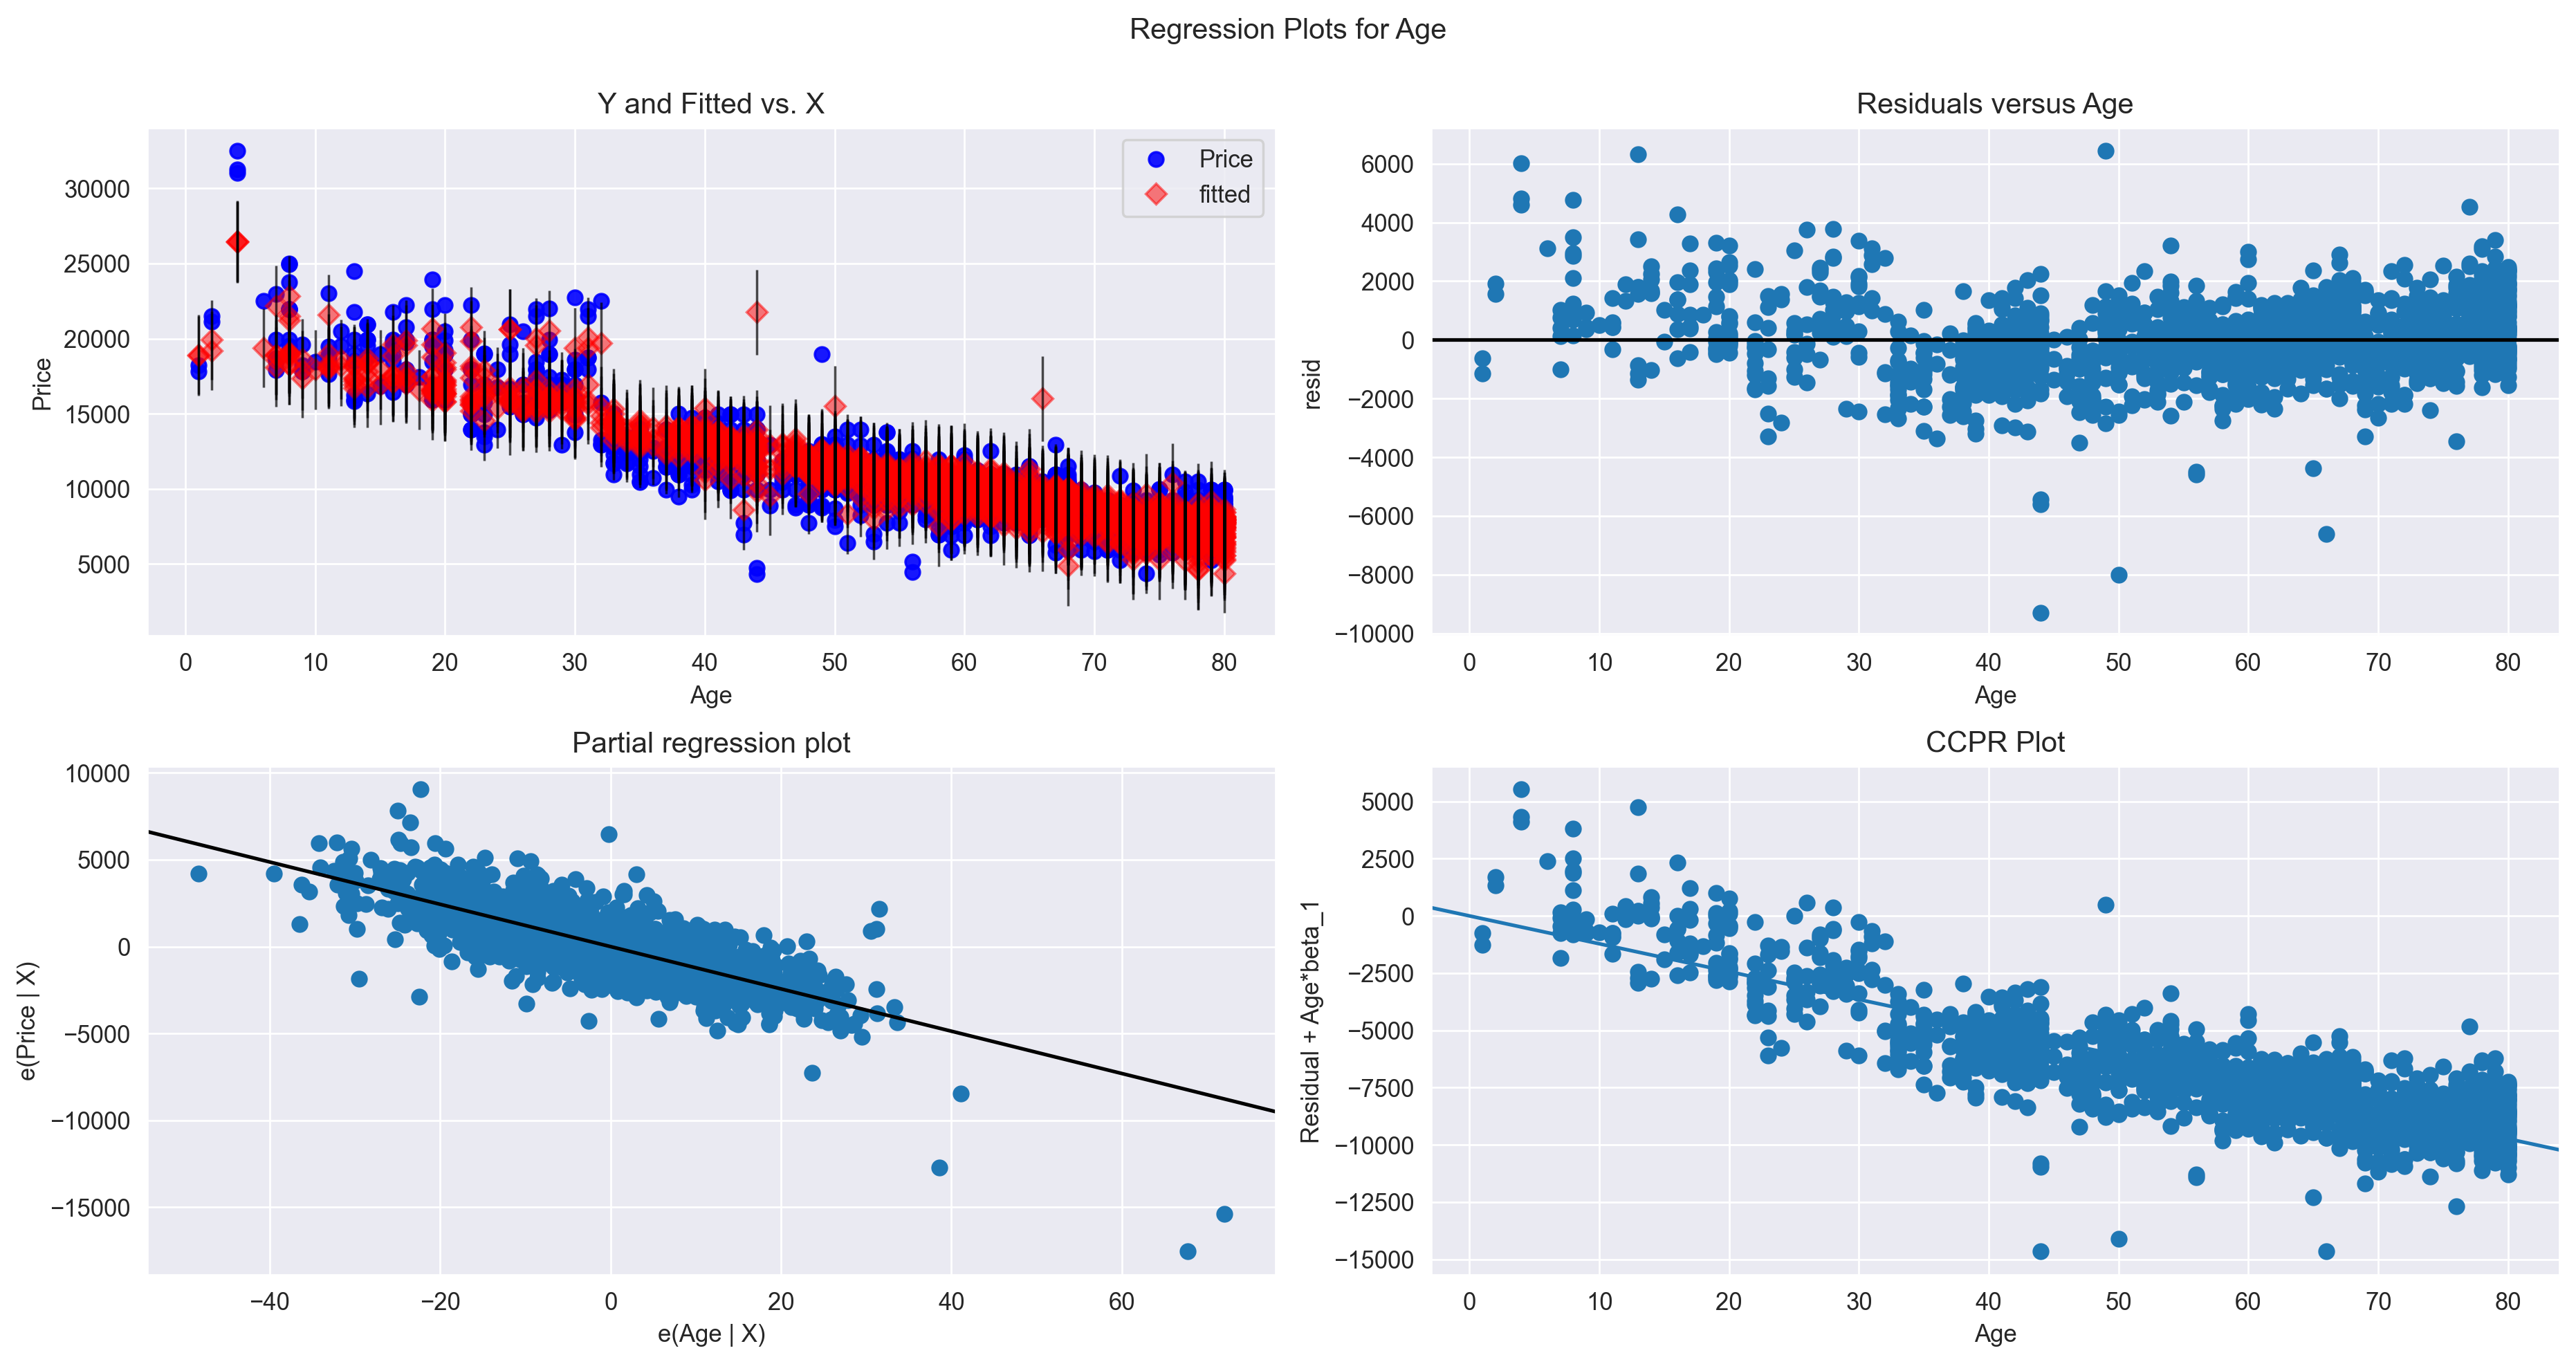

In [53]:
fig = plt.figure(figsize = (15,8))
sa.graphics.plot_regress_exog(model,'Age',fig = fig);

eval_env: 1


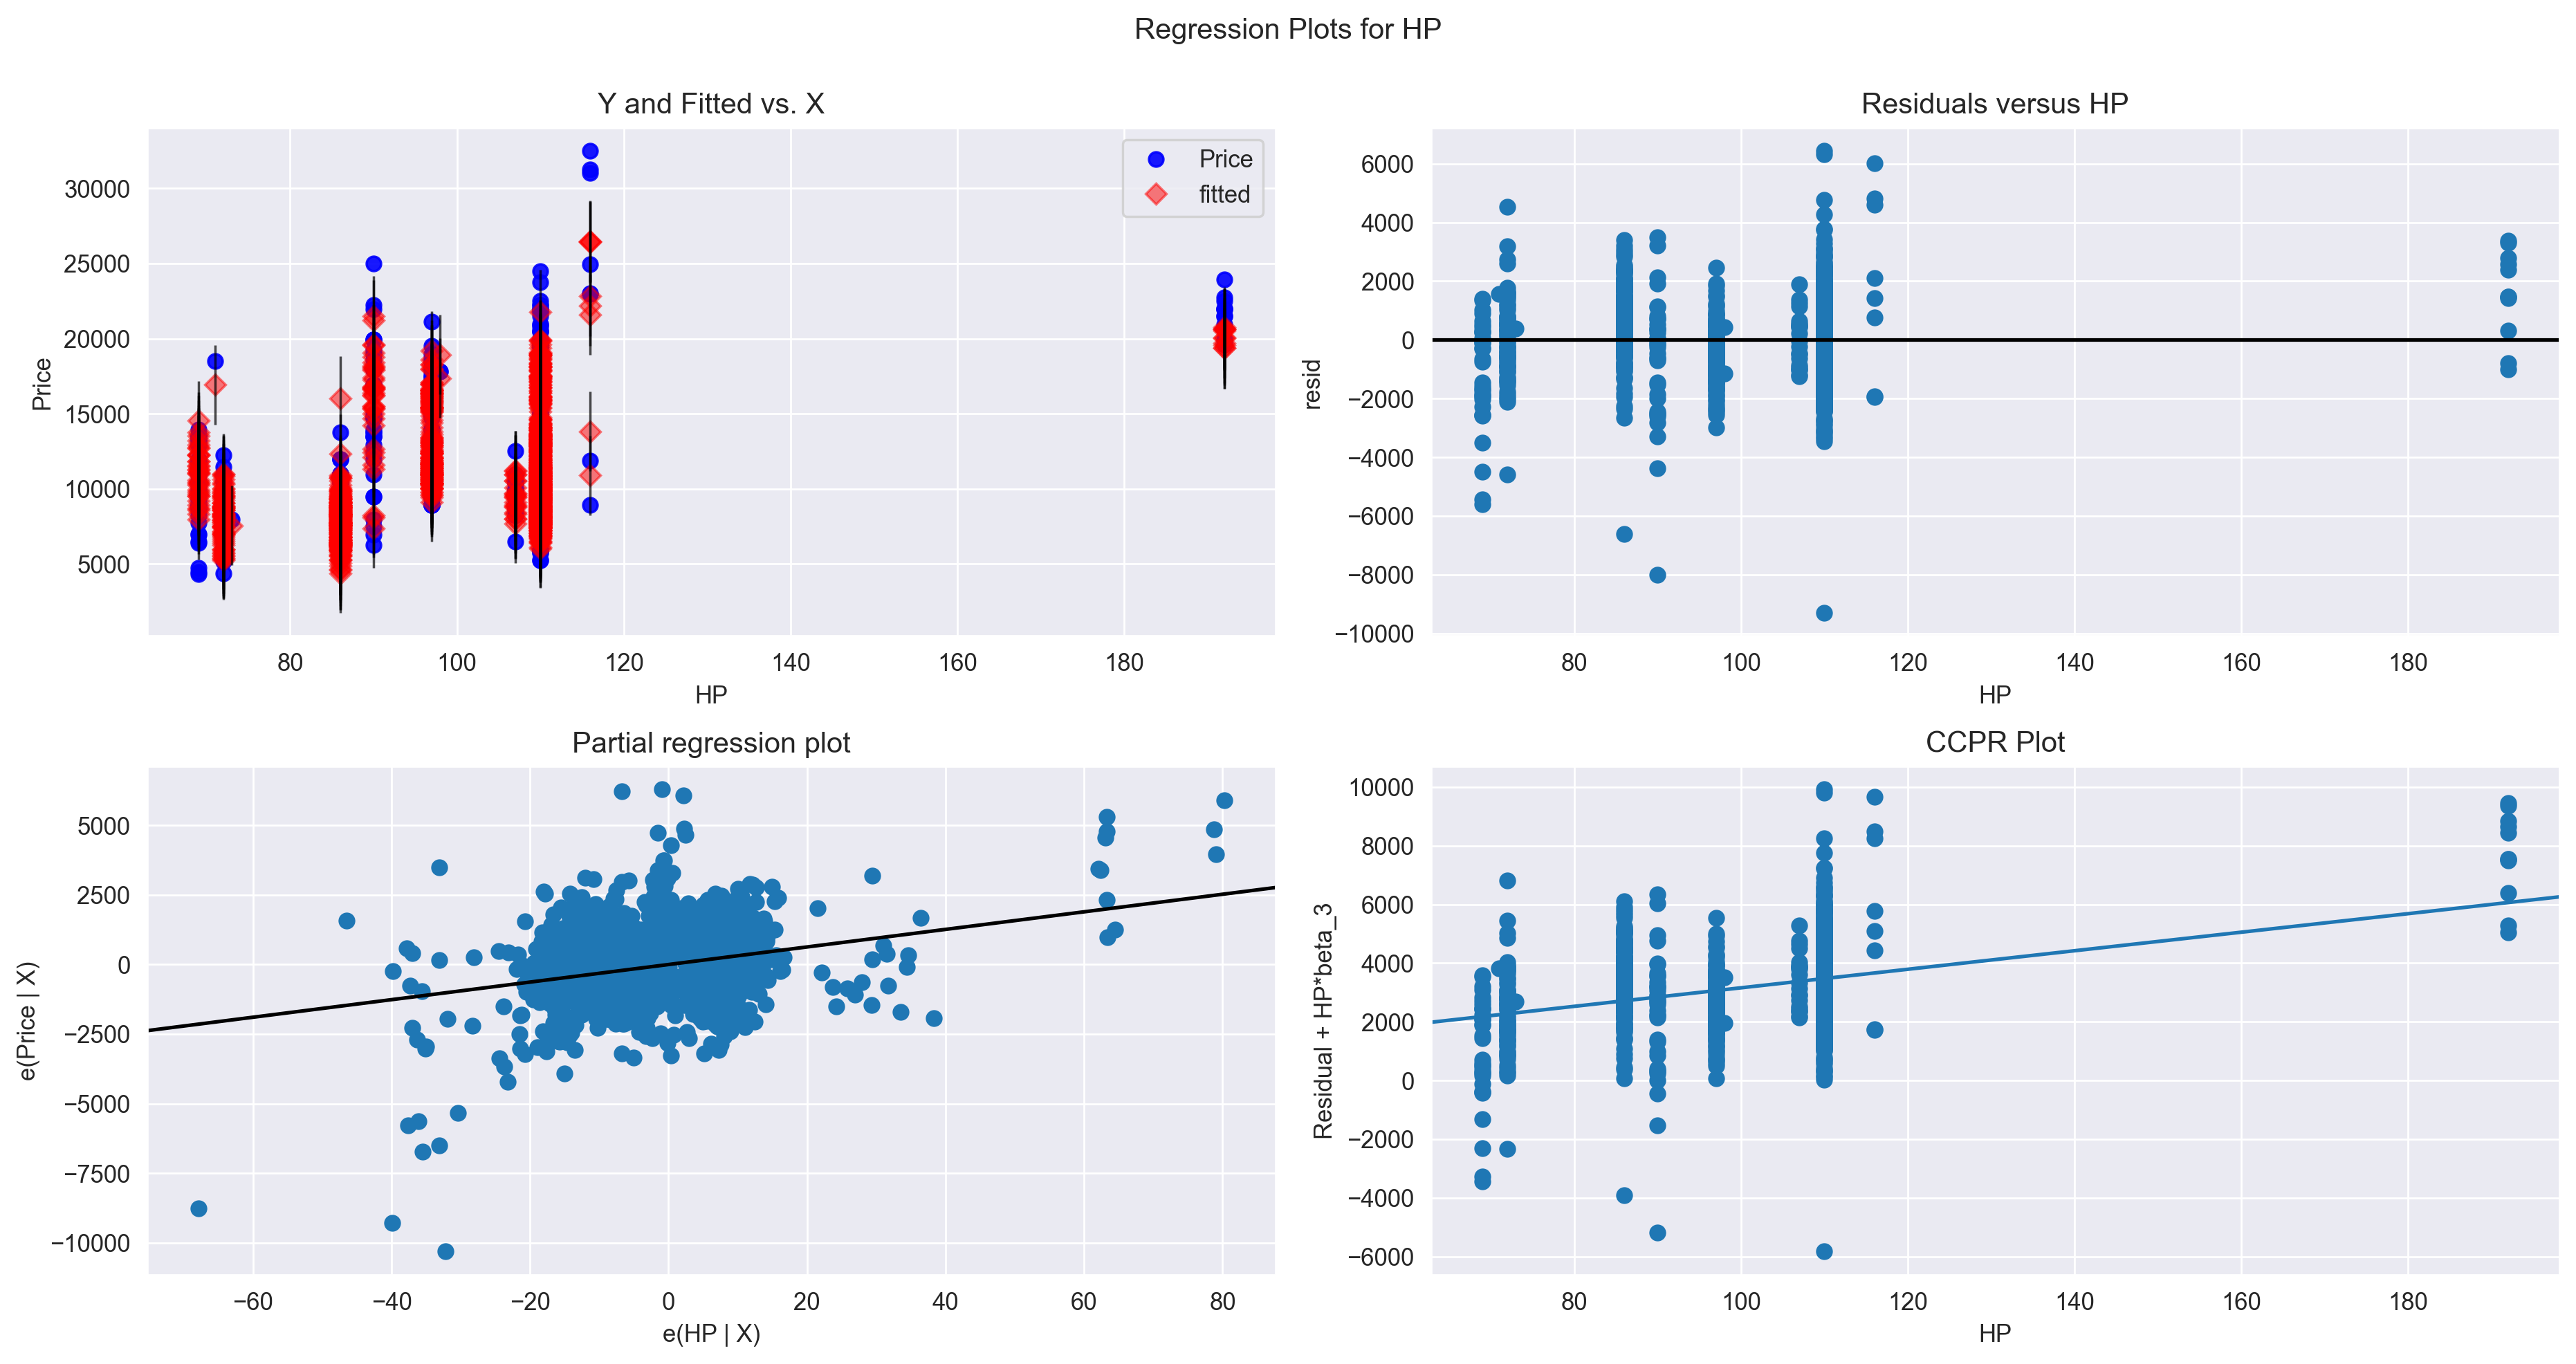

In [54]:
fig = plt.figure(figsize = (15,8))
sa.graphics.plot_regress_exog(model,'HP',fig = fig);

# Model Deletion Diagnostics

# Cook's Distance

In [55]:
inf = rmodel.get_influence()
c,p = inf.cooks_distance

In [56]:
c

array([8.19507952e-03, 4.51554723e-03, 6.19579126e-03, ...,
       1.47953713e-06, 7.66982434e-04, 1.19475212e-02])

In [57]:
p

array([0.99999995, 1.        , 0.99999998, ..., 1.        , 1.        ,
       0.99999979])

<StemContainer object of 3 artists>

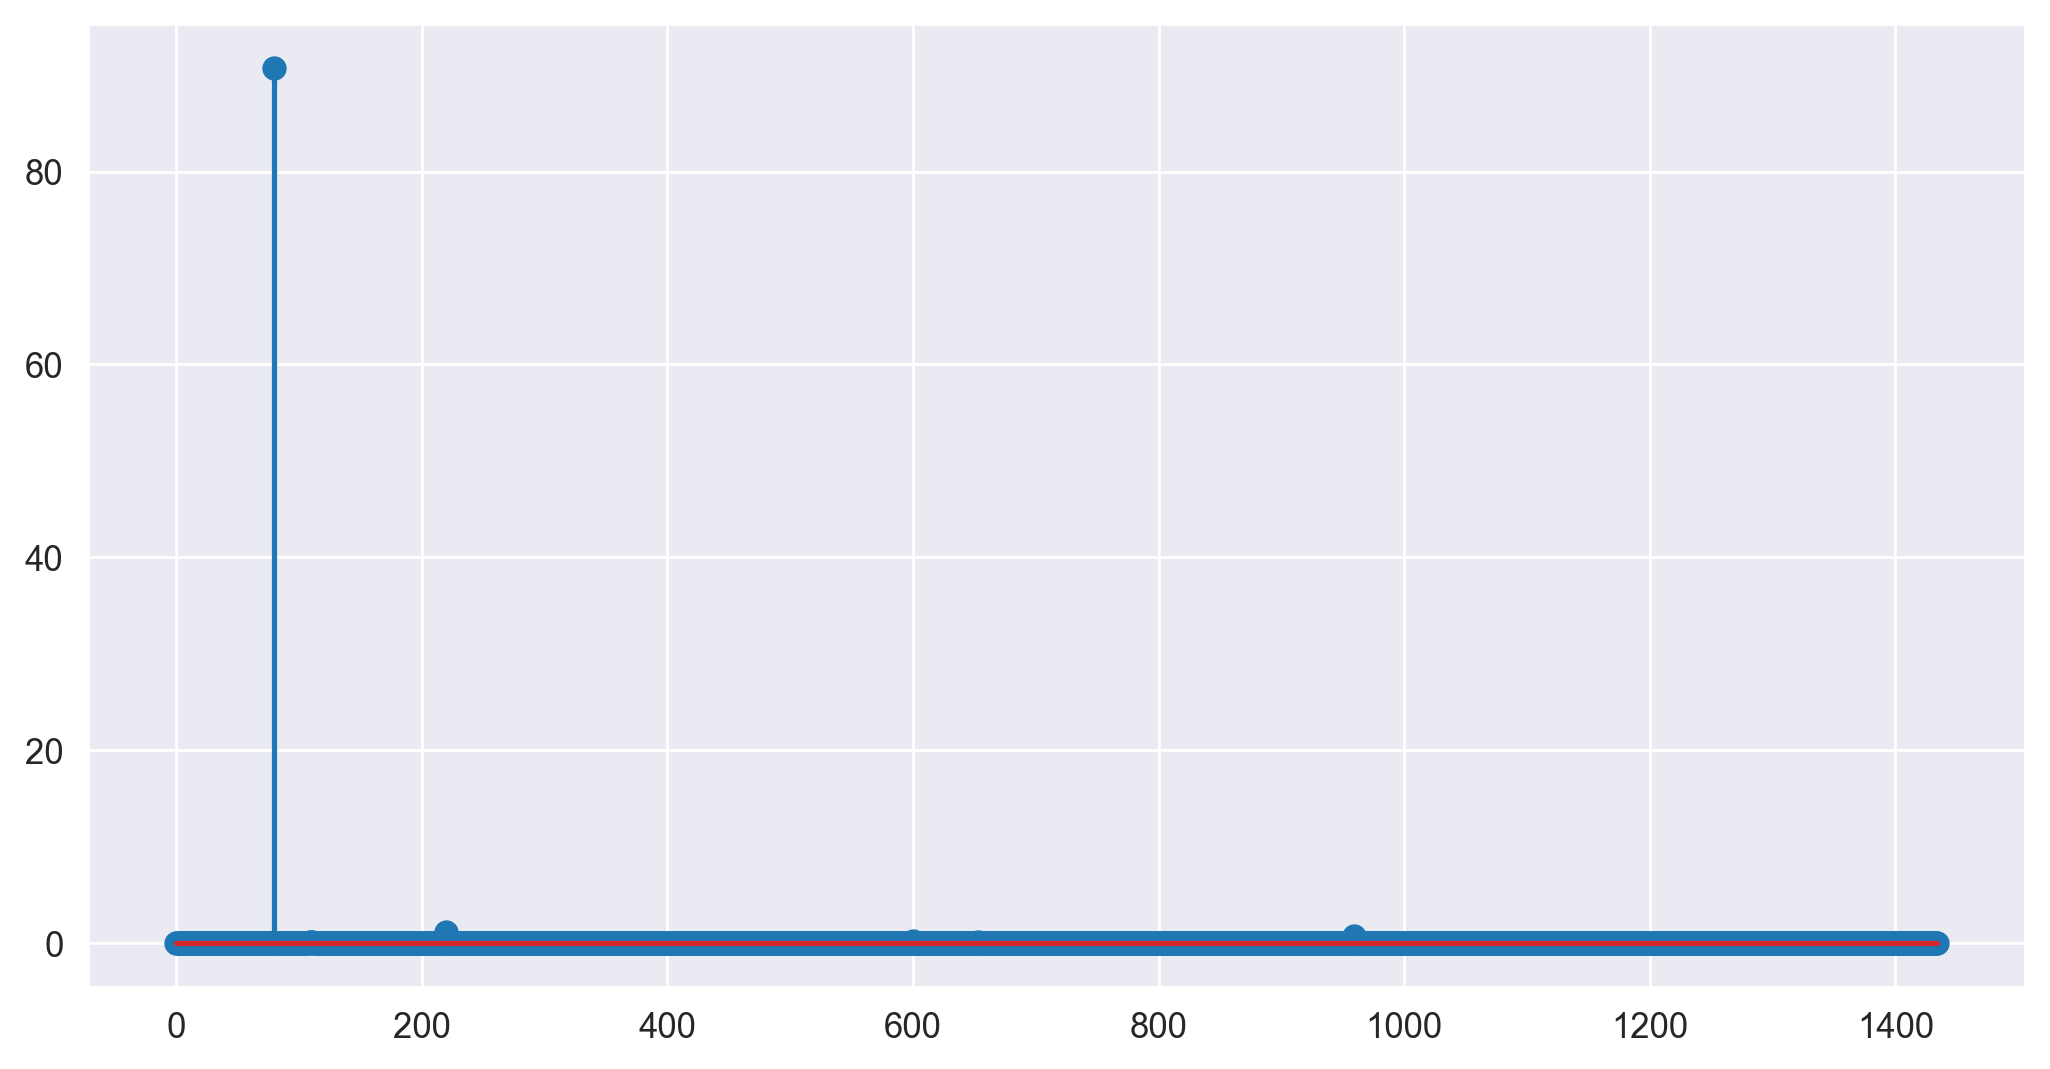

In [60]:
plt.stem(c)

In [61]:
np.argmax(c),np.max(c)

(80, 90.74324839897675)

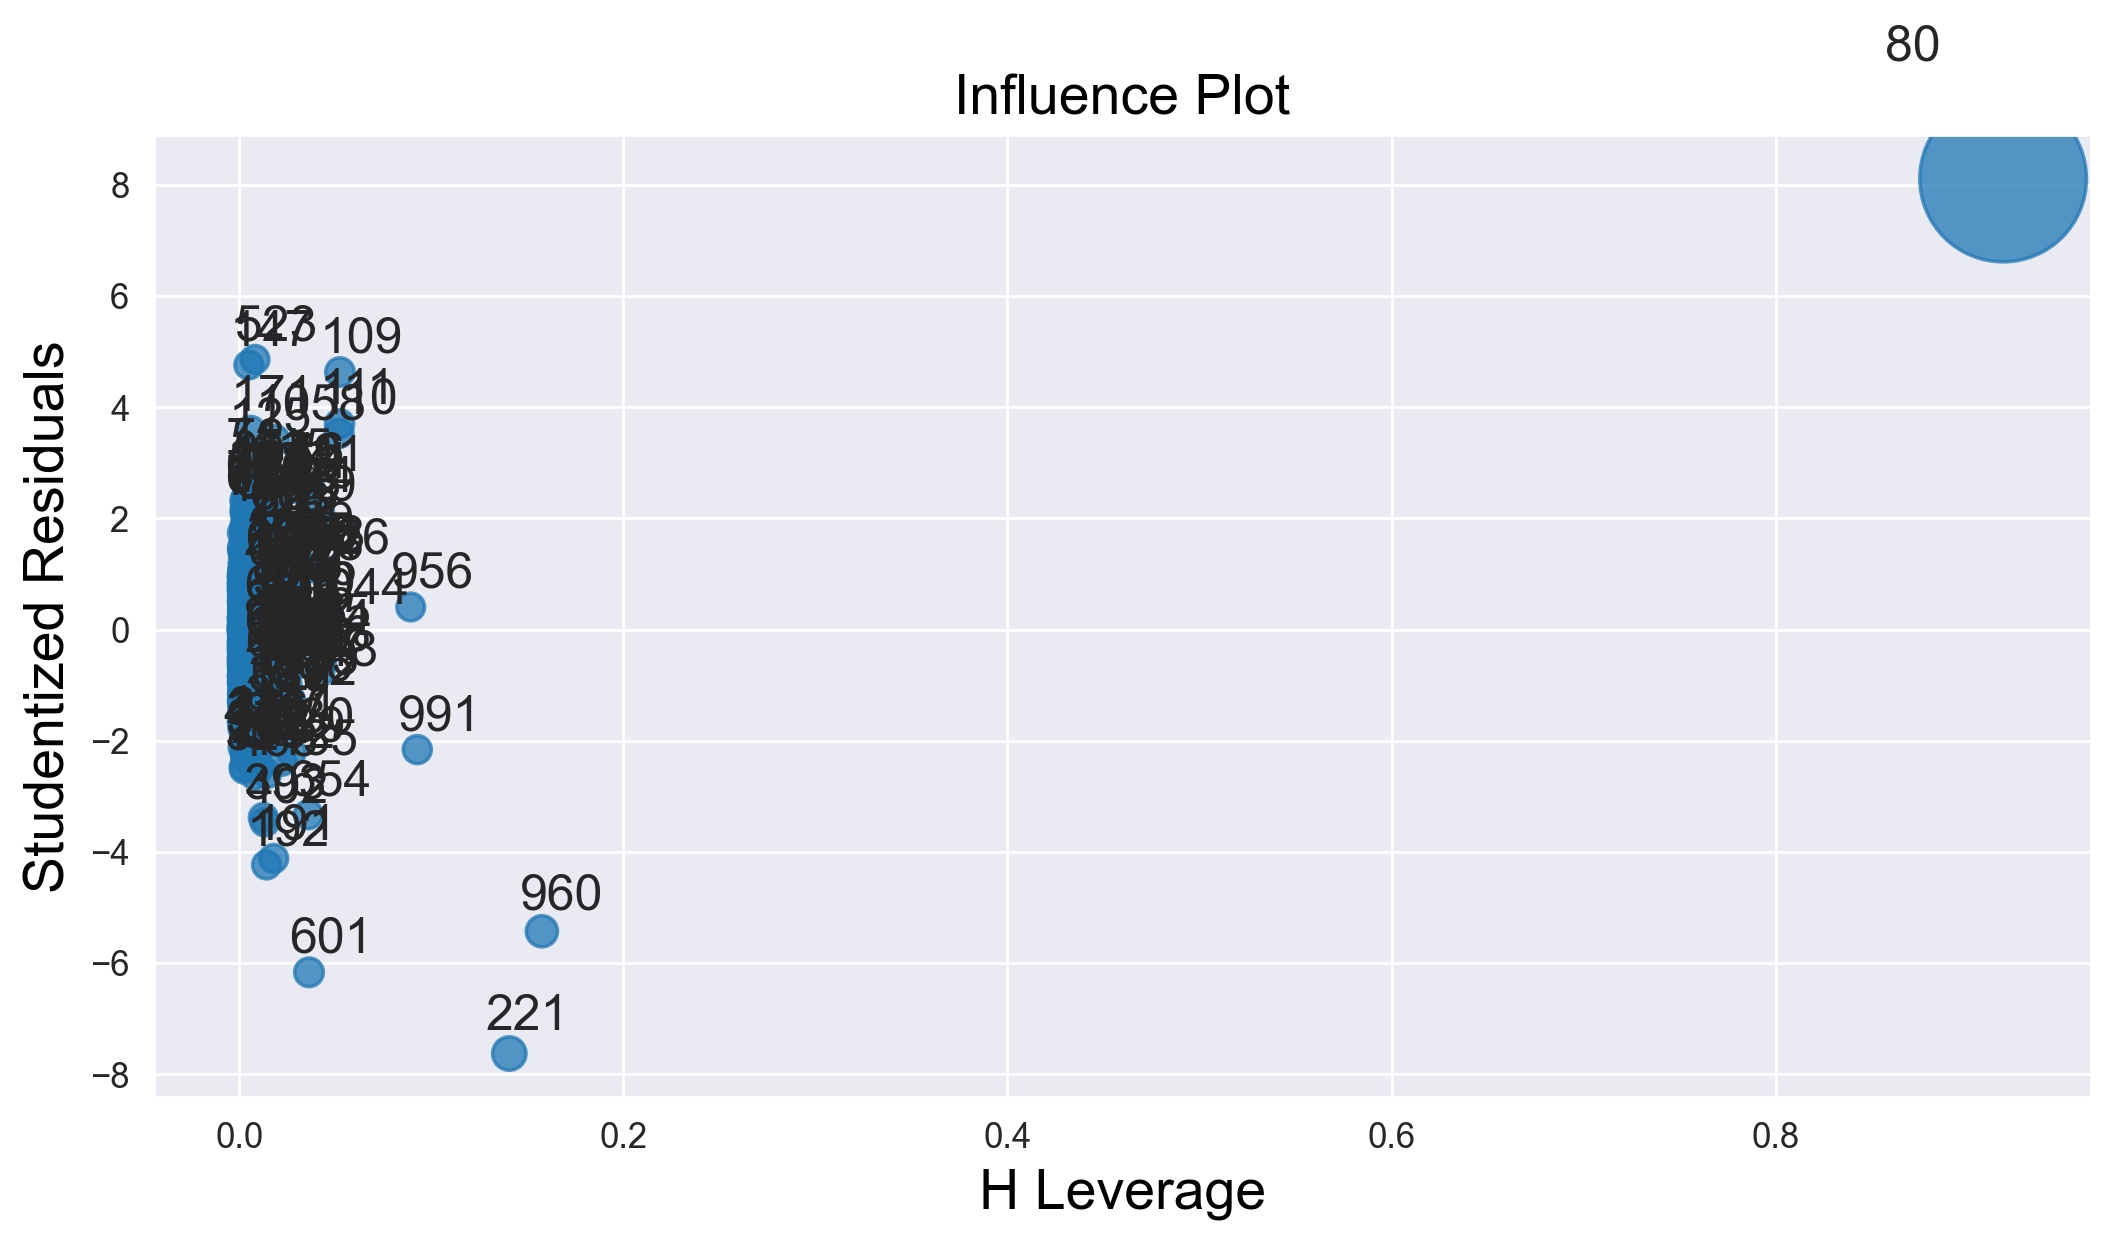

In [62]:
influence_plot(model);

# Leverage Cutoff

In [63]:
k = len(df.columns)
n = len(df)
k

9

In [64]:
lc = 3*(k+1)/n
lc

0.020905923344947737

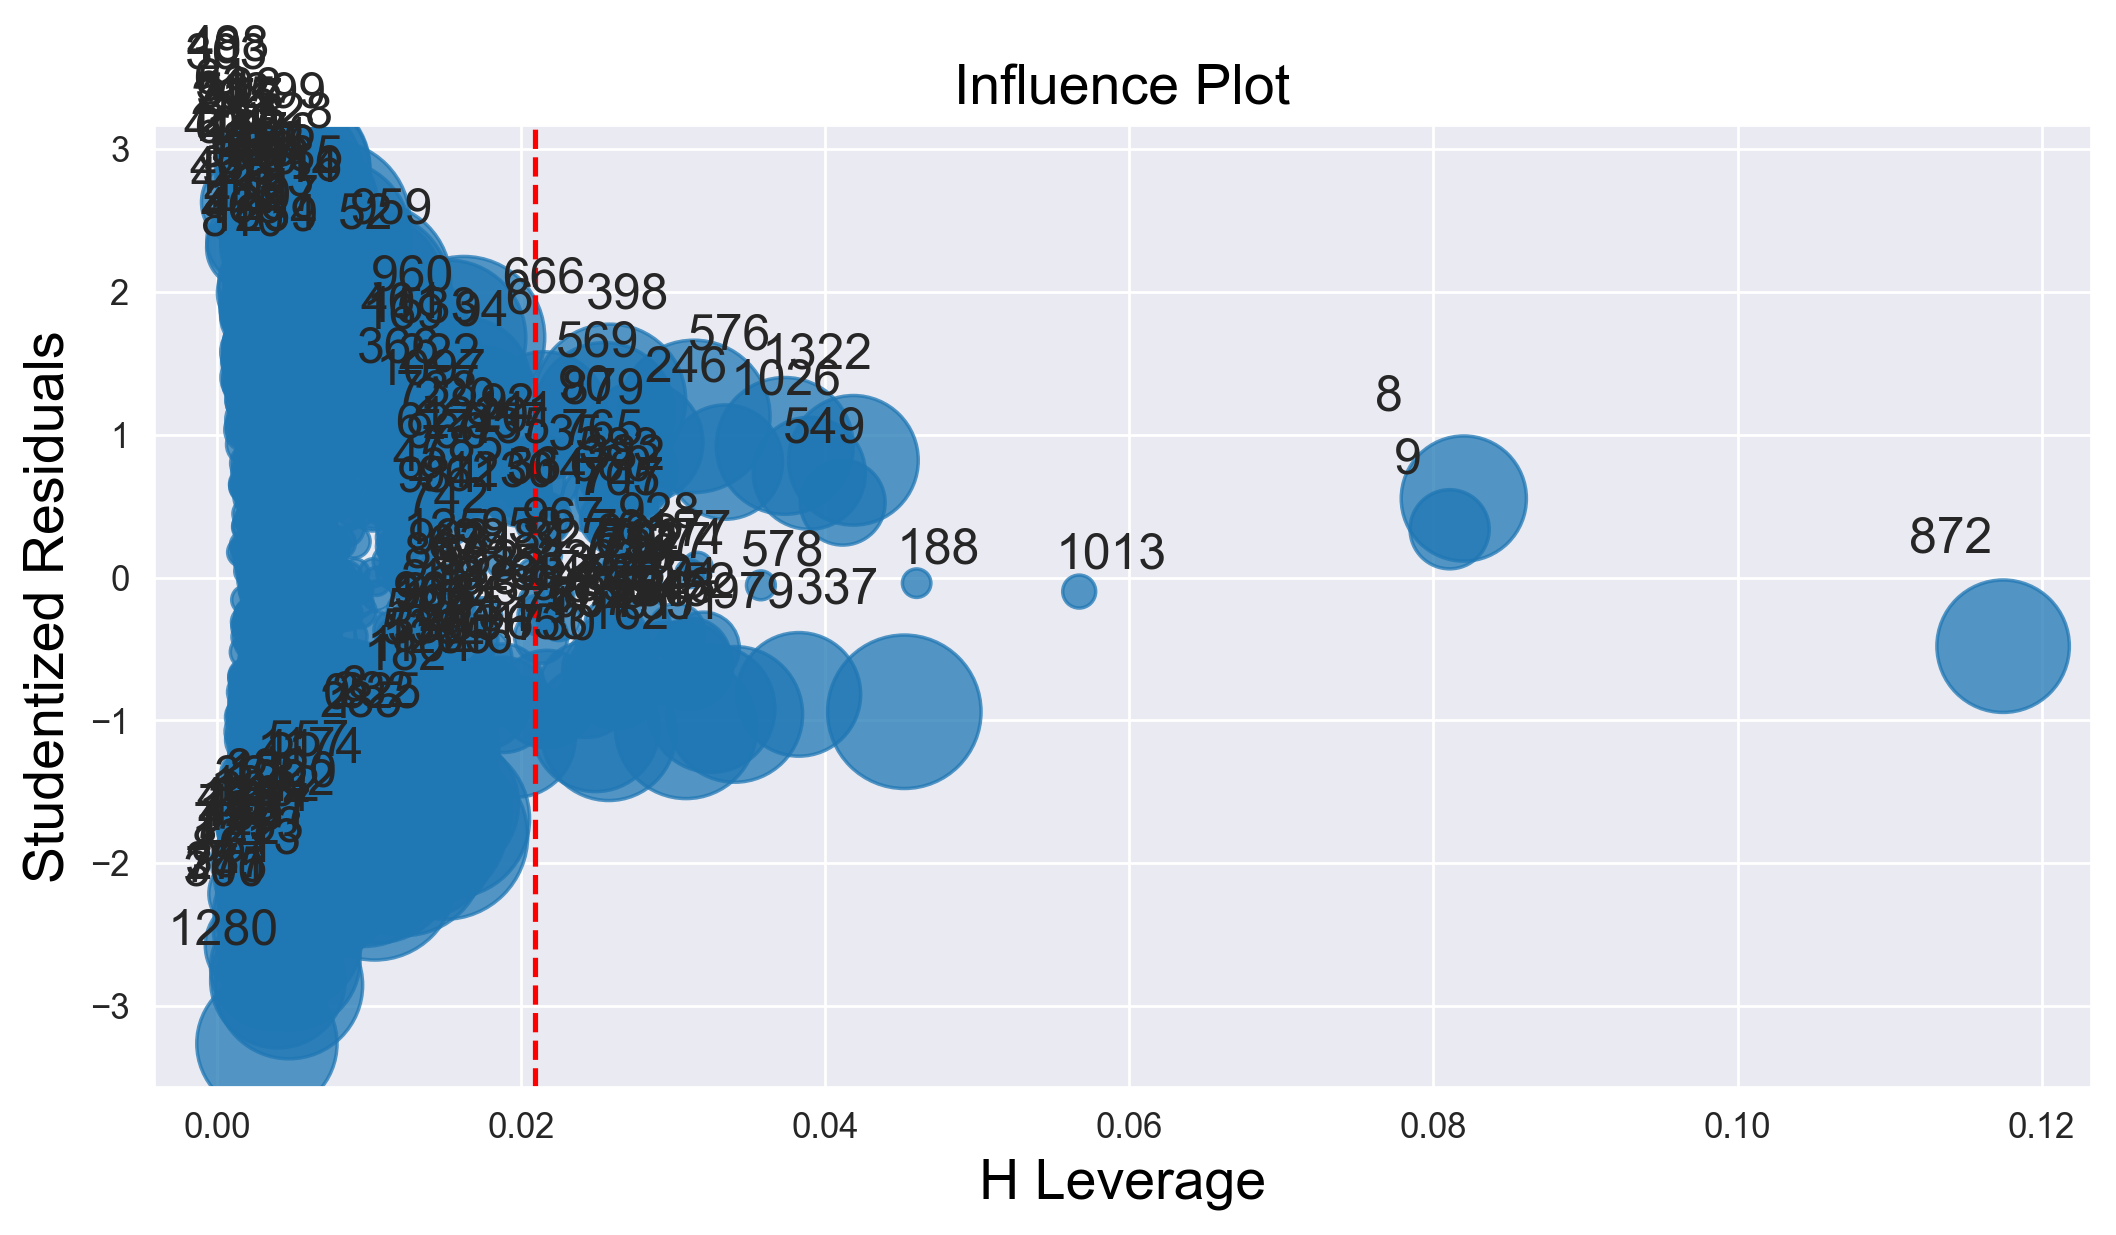

In [84]:
influence_plot(model)
plt.axvline(lc, linestyle = "--", color = 'red')

In [65]:
df.iloc[[80]]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

# Improving Model

In [66]:
df.drop(index = [80],inplace = True)
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [67]:
df.reset_index(inplace = True)
df

index  Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0         0  13500   23  46986   90  2000      3      5  210    1165
1         1  13750   23  72937   90  2000      3      5  210    1165
2         2  13950   24  41711   90  2000      3      5  210    1165
3         3  14950   26  48000   90  2000      3      5  210    1165
4         4  13750   30  38500   90  2000      3      5  210    1170
...     ...    ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   1431   7500   69  20544   86  1300      3      5   69    1025
1430   1432  10845   72  19000   86  1300      3      5   69    1015
1431   1433   8500   71  17016   86  1300      3      5   69    1015
1432   1434   7250   70  16916   86  1300      3      5   69    1015
1433   1435   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 10 columns]

In [68]:
df.drop(columns = 'index',inplace = True)
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

# Model deletation Dignosticsand final Model

In [71]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741537
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [72]:
final_model.rsquared

0.9003762532318559

# model Prediction

In [78]:
nd = pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
nd

Age     KM  HP    CC  Doors  Gears  QT  Weight
0   12  40000  80  1300      4      5  69    1012

In [80]:
final_model.predict(nd)

0    14398.815471
dtype: float64

In [82]:
d2 = {'prep_Model':['Model','final_model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table = pd.DataFrame(d2)
table

prep_Model  Rsquared
0        Model  0.900224
1  final_model  0.900376